In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
df = pd.read_csv('/content/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print('Data set contains {} observations, described by {} features.'.format(df.shape[0], df.shape[1]))

Data set contains 53940 observations, described by 10 features.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
summary = pd.DataFrame(df.dtypes, columns=['Type'])
summary['Null?'] = pd.DataFrame(df.isnull().any())
summary['Sum of nulls'] = pd.DataFrame(df.isnull().sum())
summary['% of nulls'] = round((df.apply(pd.isnull).mean()*100),2)
summary

,Type,Null?,Sum of nulls,% of nulls
carat,float64,False,0,0.0
cut,object,False,0,0.0
color,object,False,0,0.0
clarity,object,False,0,0.0
depth,float64,False,0,0.0
table,float64,False,0,0.0
price,int64,False,0,0.0
x,float64,False,0,0.0
y,float64,False,0,0.0
z,float64,False,0,0.0


In [7]:
print("x == 0: {} ".format((df.x==0).sum()))
print("y == 0: {} ".format((df.y==0).sum()))
print("z == 0: {} ".format((df.z==0).sum()))


x == 0: 8 
y == 0: 7 
z == 0: 20 


In [9]:
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)

In [10]:
df.dropna(inplace=True)
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
df.agg(['mean', 'median'])

,carat,depth,table,price,x,y,z
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
median,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000


In [12]:
df1 = df[['carat','depth','table','price','x','y','z']]

In [13]:
#H0 = sample comes from a normal distribution,
#H1 = sample not come from a normal distribution.
for feature in df1.columns.drop('price'):
    alpha = 0.05
    p_value = scipy.stats.normaltest(df[feature])[1]
    if(p_value < alpha):
        print('For feature \'' + feature +'\' null hypothesis can be rejected. Sample DOES NOT come from normal distribution.')
    else:
        print('For feature \'' + feature +'\' null hypothesis can not be rejected. Sample COMES from normal distribution.')

For feature 'carat' null hypothesis can be rejected. Sample DOES NOT come from normal distribution.
For feature 'depth' null hypothesis can be rejected. Sample DOES NOT come from normal distribution.
For feature 'table' null hypothesis can be rejected. Sample DOES NOT come from normal distribution.
For feature 'x' null hypothesis can be rejected. Sample DOES NOT come from normal distribution.
For feature 'y' null hypothesis can be rejected. Sample DOES NOT come from normal distribution.
For feature 'z' null hypothesis can be rejected. Sample DOES NOT come from normal distribution.


In [18]:
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 1.618349
Kurtosis: 2.178391


In [19]:
q1 = df.drop(['price', 'clarity', 'color'], axis = 1).quantile(0.25)
q3 = df.drop(['price', 'clarity', 'color'], axis = 1).quantile(0.75)
iqr = q3 - q1

In [20]:
low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (df.drop(['price', 'clarity', 'color'], axis = 1)[iqr.index] < low_boundary).sum()
num_of_outliers_U = (df.drop(['price', 'clarity', 'color'], axis = 1)[iqr.index] > upp_boundary).sum()
outliers = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})
outliers

,lower_boundary,upper_boundary,num_of_outliers_L,num_of_outliers_U
carat,-0.560,2.000,0,1883
depth,58.750,64.750,1504,1039
table,51.500,63.500,16,588
x,1.965,9.285,0,24
y,1.990,9.270,0,22
z,1.215,5.735,1,28


In [21]:
#All features do not come from a normal distribution so i decided to go for spearman instead of Pearson.
#Pearson coefficient correltion requires a normal distribution.
corr_mat = pd.DataFrame(np.abs(scipy.stats.spearmanr(df)[0]), columns = df.columns, index = df.columns)
corr_mat.drop('price', axis = 0, inplace = True)
corr_mat.reset_index(inplace=True)


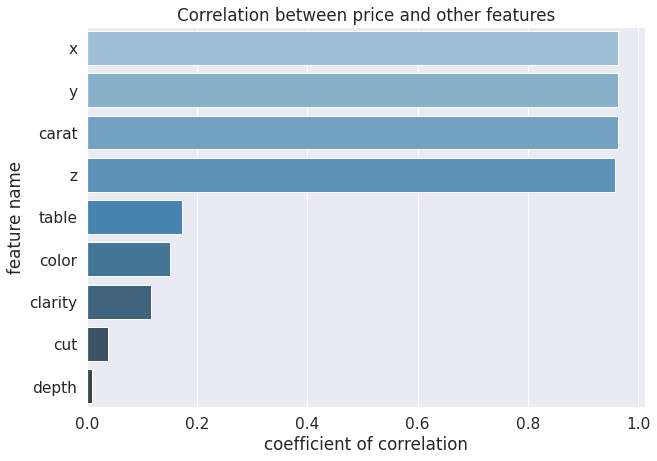

In [22]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.barplot(data = corr_mat.sort_values('price', ascending=False), x = 'price', y = 'index', palette = 'Blues_d').set(title = 'Correlation between price and other features', xlabel = 'coefficient of correlation', ylabel = 'feature name')
plt.show()

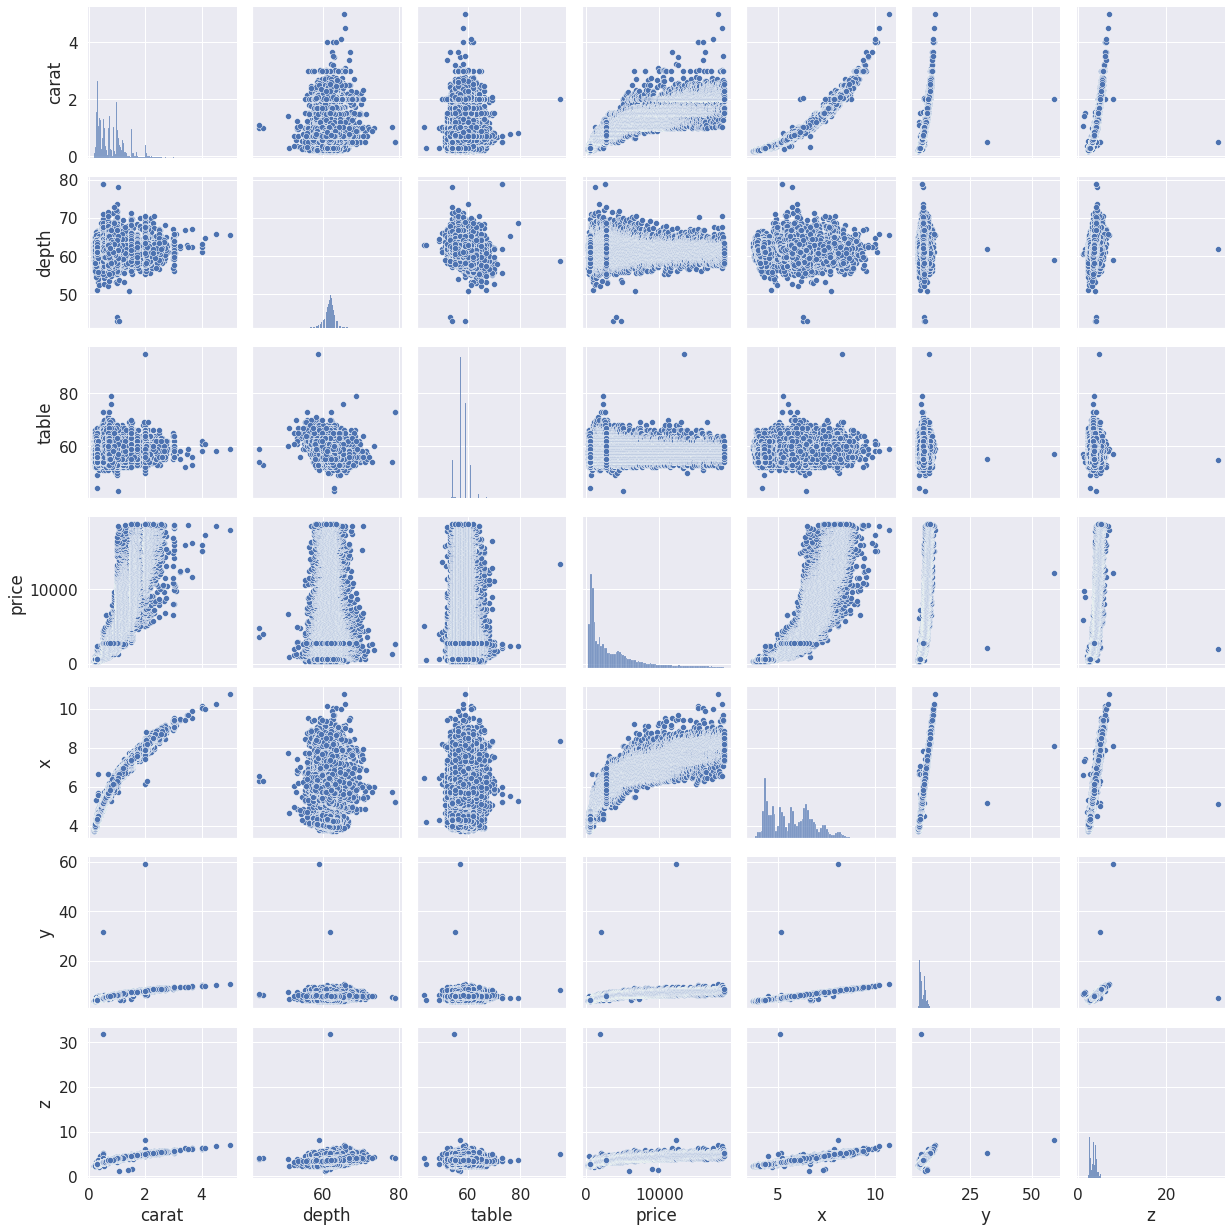

In [23]:
sns.pairplot(df)

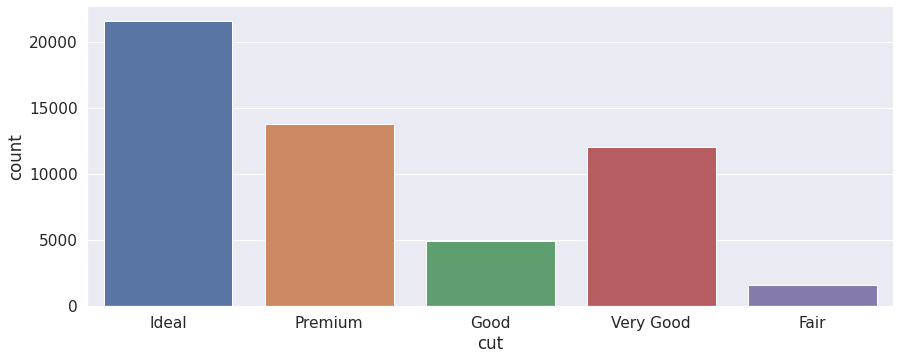

In [24]:
#Categorical features plots
sns.catplot(x='cut', data=df , kind='count', aspect=2.5)

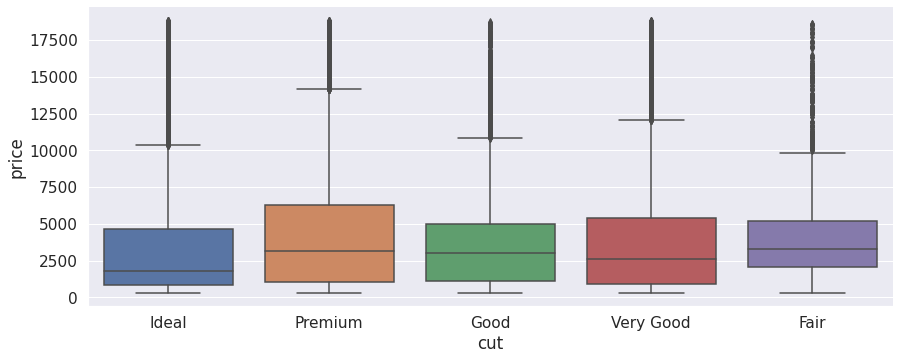

In [25]:
sns.catplot(x='cut', y='price', data=df, kind='box', aspect=2.5)

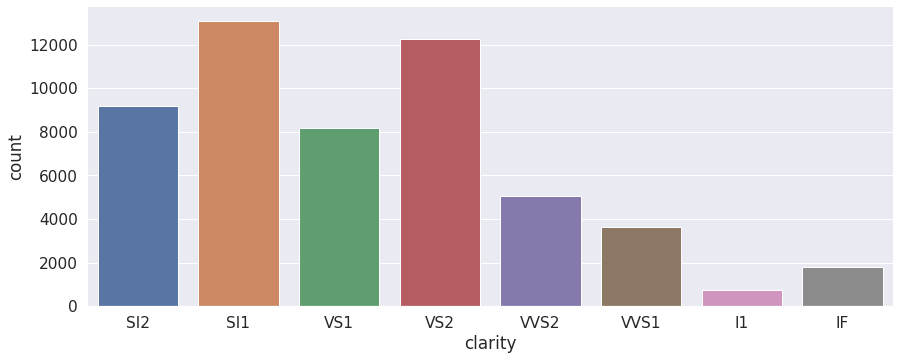

In [26]:
sns.catplot(x='clarity', data=df , kind='count', aspect=2.5)

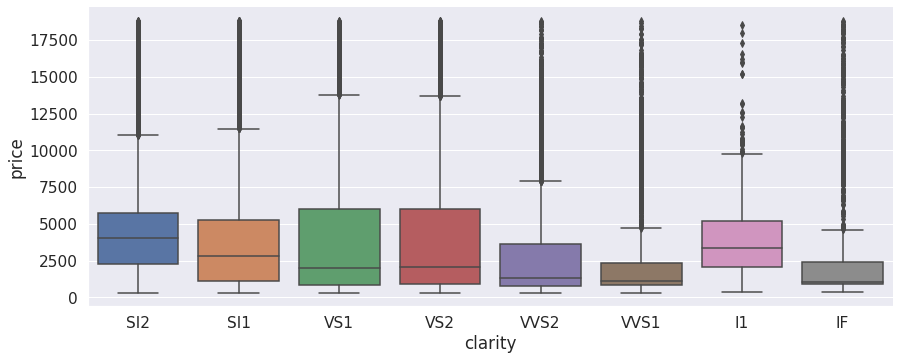

In [27]:
sns.catplot(x='clarity', y='price', data=df, kind='box', aspect=2.5)

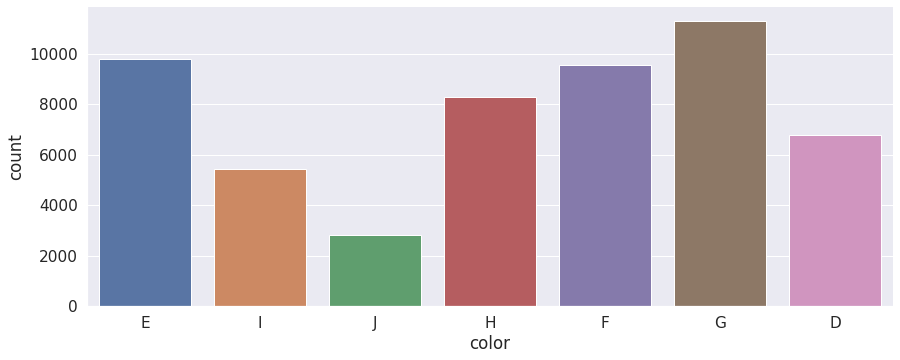

In [28]:
sns.catplot(x='color', data=df , kind='count',aspect=2.5 )

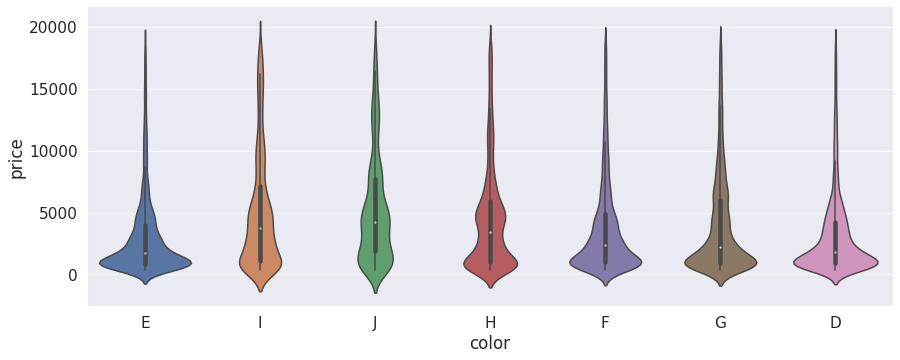

In [29]:
sns.catplot(x='color', y='price', data=df, kind='violin', aspect=2.5)

In [31]:
#X,Y,Z features are highly corelated with eachother and also carat.
#Carat stays- is the most corelated with price.
df.drop(['x','y','z'], axis=1, inplace= True)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


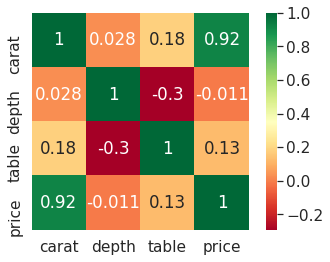

In [32]:
sns.heatmap(df.corr(), square=True, annot=True, cmap='RdYlGn')

In [33]:
encoded_df =  pd.get_dummies(df)
encoded_df.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [34]:
cols = encoded_df.columns
df_clean = pd.DataFrame(encoded_df,columns= cols)
df_clean.head()

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [44]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
numericals =  pd.DataFrame(sc_X.fit_transform(df_clean[['carat','depth','table']]),columns=['carat','depth','table'],index=df_clean.index)
df_clean[['carat','depth','table']] = numericals[['carat','depth','table']]
encoded_df = df_clean.copy(deep=True)
df_clean[['carat','depth','table']] = numericals[['carat','depth','table']]

In [37]:
#Splitting into train and test sets
x = df_clean.drop(["price"],axis=1)
y = df_clean.price
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

In [38]:
#Linear regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 91.73272771081521%
Mean absolute error: 796.6195226804225
Mean squared error: 1297212.947807026
R Squared: 0.9173272771081521
Adjusted R Squared: 0.9172146788351613


In [40]:
las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 91.730499871671%
Mean absolute error: 794.3037410296772
Mean squared error: 1297562.5167679125
R Squared: 0.91730499871671
Adjusted R Squared: 0.9171923701010825


In [41]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

las_reg = linear_model.Lasso()
las_reg.fit(train_x,train_y)
y_pred = las_reg.predict(test_x)
print("accuracy: "+ str(las_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))


accuracy: 91.730499871671%
Mean absolute error: 794.3037410296772
Mean squared error: 1297562.5167679125
R Squared: 0.91730499871671
Adjusted R Squared: 0.9171923701010825


In [42]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_x,train_y)
y_pred = tree_reg.predict(test_x)
print("accuracy: "+ str(tree_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 96.61795463535445%
Mean absolute error: 360.18831028331215
Mean squared error: 530674.7961874068
R Squared: 0.9661795463535445
Adjusted R Squared: 0.9661334837038682


In [43]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
forest_reg.fit(train_x,train_y)
y_pred = tree_reg.predict(test_x)
print("accuracy: "+ str(forest_reg.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
R2 = r2_score(test_y,y_pred)
print('R Squared: {}'.format(R2))
n=test_x.shape[0]
p=test_x.shape[1] - 1

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

accuracy: 97.85451963009253%
Mean absolute error: 360.18831028331215
Mean squared error: 530674.7961874068
R Squared: 0.9661795463535445
Adjusted R Squared: 0.9661334837038682
